In [1]:
import sys
import numpy as np
import gc
import matplotlib.pyplot as plt
import math

#sys.path.append("/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times") 
import ExperimentalRelaxationTimes as ERT

gc.collect()


#### Code requres python 3.8 or newer, as math.dist is not implemented before ####

0

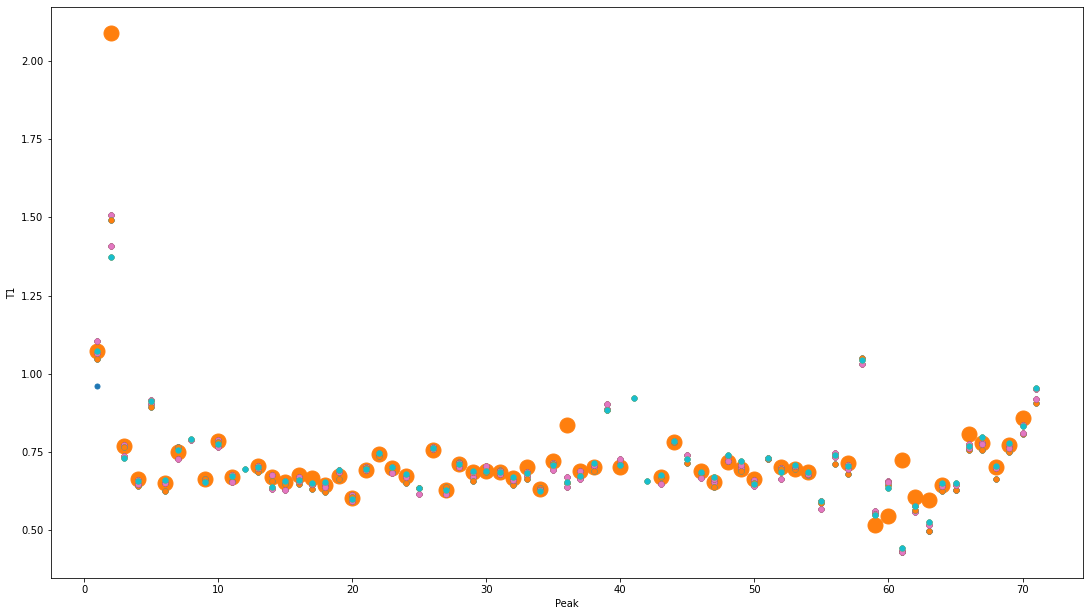

In [2]:
path="/home/nenciric/Documents/git/COR15A_Tobi/ExperimentalData/600MHz/Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022/T1/experiment_110/"
field="600 MHz"
coeffs=[2,8,32,64]
outputs=[0,2,8,32,128]
author=["Ricky Nencini",  "ricky.nencini@helsinki.fi"]
info="Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022"
increments=223
data_from_DynamicCenter="T1_223incr_no_0coeff_0output.txt"
data_from_DynamicCenter=path+data_from_DynamicCenter
results=[ERT.t1_t2_relaxations(data_from_DynamicCenter,field,0,0,author,info,increments)]
for coeff in coeffs:
    for outputP in outputs:
        data_from_DynamicCenter="T1_"+str(increments)+"incr_no_"+str(coeff)+"coeff_"+str(outputP)+"output.txt"
        data_from_DynamicCenter=path+data_from_DynamicCenter
        results.append(ERT.t1_t2_relaxations(data_from_DynamicCenter,field,coeff,outputP,author,info,increments))

comparison=ERT.compare_spectra(*results)
ERT.plot_data(comparison,coeffs,outputs)

In [3]:
results

[{'peaks': {'1': {'ppm': ['-97.274', '-218.151'],
    'experiment': array([4.24443536e+08, 4.25222697e+08, 4.15158102e+08, 3.76684597e+08,
           3.41511493e+08, 2.82319355e+08, 2.32653488e+08, 1.90636964e+08,
           1.10001542e+08, 7.77311220e+07]),
    'fit': (array([-0.9325281 , 19.92415721]),
     array([0.001129]),
     2,
     array([1.32134322, 0.50403581]),
     1.9984014443252818e-15),
    'points_used': 9},
   '2': {'ppm': ['-99.208', '-218.263'],
    'experiment': array([9948633., 9274010., 9305442., 6773313., 7538441., 5994742.,
           4972841., 5735706., 4800120.,       0.]),
    'fit': (array([-0.47875951, 16.02280489]),
     array([0.05545579]),
     2,
     array([1.31679107, 0.51581129]),
     1.3322676295501878e-15),
    'points_used': 6},
   '3': {'ppm': ['-99.724', '-217.682'],
    'experiment': array([1.19109539e+08, 1.30126346e+08, 1.22778990e+08, 1.03473009e+08,
           9.23236510e+07, 7.24841050e+07, 5.62079280e+07, 4.04031520e+07,
           1.99

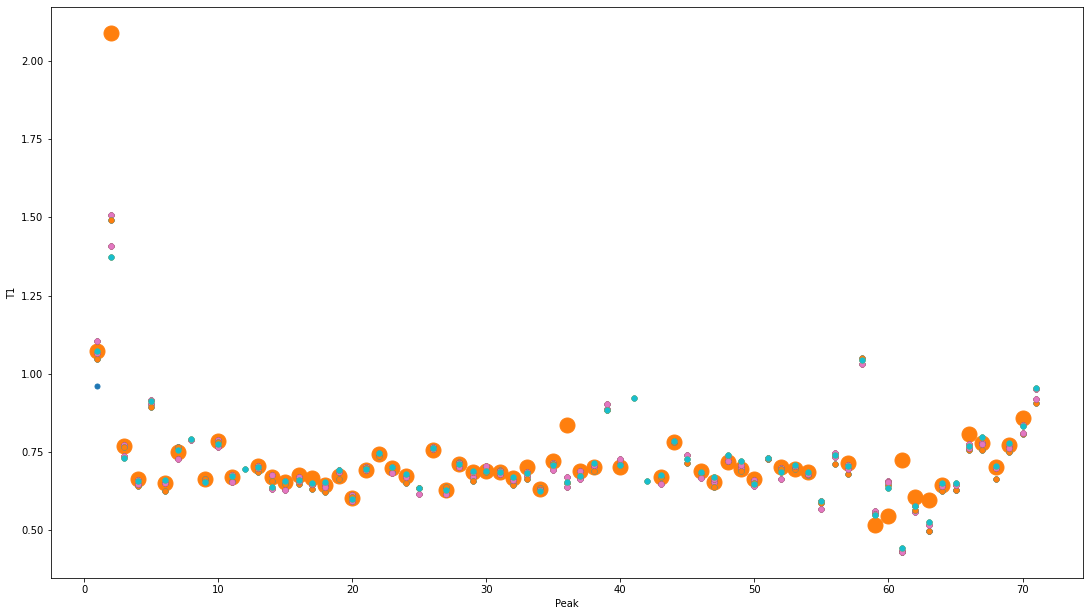

In [22]:
comparison=ERT.compare_spectra(*results)
#print(ERT.compare_spectra(*results))
plot_data(comparison,coeffs,outputs)

In [21]:
def plot_data(comparison,coeffs,outputs):
    keys=["REFERENCE"]
    for i in range(len(coeffs)*len(outputs)):
        keys.append("file"+str(i))

    for file in keys:
        x_axis=[]
        y_axis=[]
        for peak in comparison:
            if file in comparison[peak]:
                x_axis.append(int(peak))
                y_axis.append(comparison[peak][file]["T1"])
                if int(comparison[peak][file]["COEFFICIENTS"])==0 and int(comparison[peak][file]["OUTPUT_POINTS"])==0:
                    refe=file
                else:
                    refe=-20
        if refe==file:
            plt.plot(x_axis, y_axis,'o',markersize=15)
        else:
            plt.plot(x_axis, y_axis,'o',markersize=5)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.xlabel('Peak')
    plt.ylabel('T1')
    plt.show()
    

In [4]:
x_axis=[]
y_axis=[]
for peak in results:
    x_axis.append(int(peak))
    one_line=[]
    for i,spectra in enumerate(results[peak]):
        one_line.append(results[peak][spectra]["T1"])
    y_axis.append(one_line)

#y_axis=np.reshape(y_axis, (len(y_axis), i+1)).T

[{'peaks': {'1': {'ppm': ['-97.274', '-218.151'],
    'experiment': array([4.24443536e+08, 4.25222697e+08, 4.15158102e+08, 3.76684597e+08,
           3.41511493e+08, 2.82319355e+08, 2.32653488e+08, 1.90636964e+08,
           1.10001542e+08, 7.77311220e+07]),
    'fit': (array([-0.9325281 , 19.92415721]),
     array([0.001129]),
     2,
     array([1.32134322, 0.50403581]),
     1.9984014443252818e-15),
    'points_used': 9},
   '2': {'ppm': ['-99.208', '-218.263'],
    'experiment': array([9948633., 9274010., 9305442., 6773313., 7538441., 5994742.,
           4972841., 5735706., 4800120.,       0.]),
    'fit': (array([-0.47875951, 16.02280489]),
     array([0.05545579]),
     2,
     array([1.31679107, 0.51581129]),
     1.3322676295501878e-15),
    'points_used': 6},
   '3': {'ppm': ['-99.724', '-217.682'],
    'experiment': array([1.19109539e+08, 1.30126346e+08, 1.22778990e+08, 1.03473009e+08,
           9.23236510e+07, 7.24841050e+07, 5.62079280e+07, 4.04031520e+07,
           1.99

In [6]:
daticka=["lelky","deti","achjo","tenPodzimJeKrasny"]

In [12]:
def count(t):
    bigger=False
    smaller=False
    counter=1
    help_counter=1
    for i in range(1,len(t)):
        if t[i]<t[i-1] and not smaller:
            print("t_i: {} smaller than t_i-1: {}".format(t[i],t[i-1] ))
            help_counter+=1
            smaller=True
            bigger=False
        elif t[i]>t[i-1] and not bigger:
            print("t_i: {} bigger than t_i-1: {}".format(t[i],t[i-1] ))
            help_counter+=1
            smaller=False
            bigger=True
        else:
            help_counter=2
        counter+=help_counter
    return counter
    # TODO

if __name__ == "__main__":
    print(count([1,2,3,4])) # 7
    print(count([1,4,2,5,3])) # 15
    print(count([7,2,1,3,5,4,6])) # 17 

t_i: 2 bigger than t_i-1: 1
2
2
2
done
7
t_i: 4 bigger than t_i-1: 1
2
t_i: 2 smaller than t_i-1: 4
3
t_i: 5 bigger than t_i-1: 2
4
t_i: 3 smaller than t_i-1: 5
5
done
15
t_i: 2 smaller than t_i-1: 7
2
2
t_i: 3 bigger than t_i-1: 1
3
2
t_i: 4 smaller than t_i-1: 5
3
t_i: 6 bigger than t_i-1: 4
4
done
17
